# PRML Figure 9.8
Reference:
- https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
- https://scikit-learn.org/stable/modules/mixture.html#mixture

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

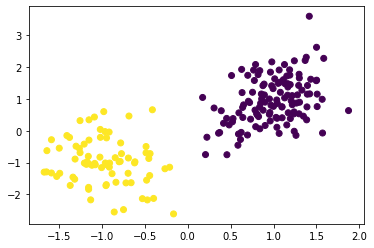

In [2]:
mu_A = np.array([-1., -1.])
mu_B = np.array([+1., +1.])
sigma_A = np.array([[0.1, 0], [0, 0.5]])
sigma_B = np.array([[0.1, 0.1], [0.1, 0.5]])
pi_A = 0.6
pi_B = 0.4

def sample_data(n):
    z = np.random.choice(2, n, p=[pi_A, pi_B])[:, np.newaxis]
    A = np.random.multivariate_normal(mu_A, sigma_A, size=n)
    B = np.random.multivariate_normal(mu_B, sigma_B, size=n)
    x = np.where(z, A, B)
    return x, z

x, z = sample_data(200)
_ = plt.scatter(x[:, 0], x[:, 1], c=z)

### Plotのための準備

In [3]:
# For contour plot
n_grid = 200
xx, yy =  np.meshgrid(np.linspace(-3, 3, n_grid), np.linspace(-3, 3, n_grid))
xy = np.array([xx, yy]).reshape([2, -1]).T


def gauss2d(x, mean, cov):
    inv = np.linalg.inv(cov)
    p = np.einsum("ij,jk,ik->i", x - mean, inv, x - mean)
    return  np.exp(-p / 2) / (2 * np.pi)


def fit_and_plot(K, print_detcov=False):
    from sklearn.mixture import GaussianMixture
    # init_params='kmeans': 初期化をK-meansで行う
    # reg_covar: sigmaが小さくならないように微小量を対角成分に入れる (デモのために今は非常に小さい値を使う)
    gm = GaussianMixture(n_components=K, init_params='kmeans', reg_covar=1e-8).fit(x)

    for i in range(K):
        # print(f"{i}-gaussian")
        # print(f"  means       = {gm.means_[i]}")
        # print(f"  covariances = {gm.covariances_[i].tolist()}")
        if print_detcov:
            print(f"{i}-gaussian, det(cov) = {np.linalg.det(gm.covariances_[i])}")

        f = gauss2d(xy, gm.means_[i], gm.covariances_[i])
        _ = plt.contour(xx, yy, f.reshape([n_grid, n_grid]), levels=1)

    _ = plt.scatter(x[:, 0], x[:, 1], c=z)


## Fit (K=1)

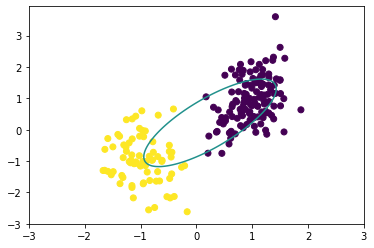

In [4]:
fit_and_plot(K=1)

## Fit (K=2)

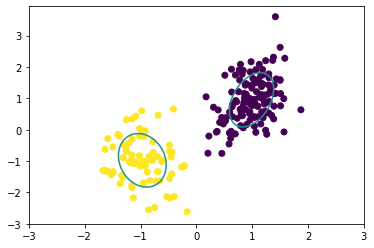

In [5]:
fit_and_plot(K=2)

## Fit (K=3)

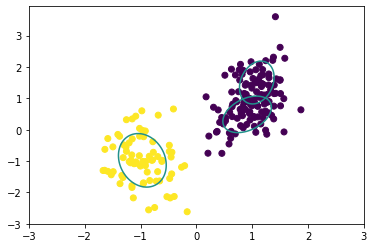

In [6]:
fit_and_plot(K=3)

## Fit (K=20)

0-gaussian, det(cov) = 0.0032723772187424906
1-gaussian, det(cov) = 0.0005956725855901749
2-gaussian, det(cov) = 0.0004883946997919724
3-gaussian, det(cov) = 2.0302739178300665e-06
4-gaussian, det(cov) = 0.0007665203717541975
5-gaussian, det(cov) = 0.00017921573850122752
6-gaussian, det(cov) = 0.0004924723904738632
7-gaussian, det(cov) = 0.0007439277011181657
8-gaussian, det(cov) = 0.0006274734317934043
9-gaussian, det(cov) = 0.0035881774045895837
10-gaussian, det(cov) = 5.575178782526627e-05
11-gaussian, det(cov) = 4.1577729216021224e-05
12-gaussian, det(cov) = 0.0015639935023061347
13-gaussian, det(cov) = 0.0014681984720438012
14-gaussian, det(cov) = 0.0003999364603807561
15-gaussian, det(cov) = 3.359850248659234e-07
16-gaussian, det(cov) = 0.0011489148537887032
17-gaussian, det(cov) = 0.0012622726414242213
18-gaussian, det(cov) = 7.0590831178845645e-06
19-gaussian, det(cov) = 0.00031774272647048076


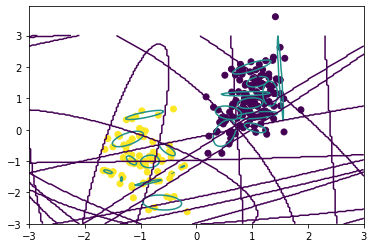

In [7]:
fit_and_plot(20, print_detcov=True)